In [46]:
!pip install gspread
!pip install gspread-dataframe
!pip install japanize-matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 4.1/4.1 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for japanize-matplotlib: started
  Running setup.py install for japanize-matplotlib: finished with status 'done'


  DEPRECATION: japanize-matplotlib is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import requests
from bs4 import BeautifulSoup
import gspread 
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
import json
import matplotlib.pyplot as plt
import seaborn as sns  # seabornはmatplotlibの上に構築されており、より魅力的な可視化を提供します。
import japanize_matplotlib

スプレッドシートと連携

In [48]:

SP_CREDENTIAL_FILE="C:\\Users\kouhei_shimakura\\楽天トラベルAPI\\Scraping\\gspread-test-399023-650ba3322327.json"
SP_COPE=[
  'https://www.googleapis.com/auth/drive',
  'https://spreadsheets.google.com/feeds'
]
SP_SHEET_KEY='1BzQ19jeu8m6hpW9MYXRCDM9Q8S5VhKWTQV-pL6a9ngI'
SP_SHEET='shinjuku1'

In [49]:
credentials = Credentials.from_service_account_file(SP_CREDENTIAL_FILE, scopes=SP_COPE)
gc = gspread.authorize(credentials)

HTML取得

In [50]:
url = 'http://suumo.jp/chintai/tokyo/sc_shinjuku/?page={}'
target_url = url.format(1)
print(target_url)

http://suumo.jp/chintai/tokyo/sc_shinjuku/?page=1


In [51]:
r = requests.get(target_url)
soup = BeautifulSoup(r.text)

In [52]:
r

<Response [200]>

1ページあたりの物件情報を取得

In [53]:
contents = soup.find_all('div',class_='cassetteitem')

In [54]:
len(contents)

20

In [55]:
content = contents[0]
content

<div class="cassetteitem">
<div class="cassetteitem-detail">
<div class="cassetteitem-detail-object">
<div class="cassetteitem_object">
<div class="cassetteitem_object-item">
<img alt="" class="js-noContextMenu js-linkImage js-scrollLazy js-adjustImg" height="0" rel="https://img01.suumo.com/front/gazo/fr/bukken/405/100343632405/100343632405_gw.jpg" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAAAAACH5BAEAAAAALAAAAAABAAEAAAICRAEAOw%3D%3D" width="0"/>
</div>
</div>
</div>
<div class="cassetteitem-detail-body">
<div class="cassetteitem_content">
<div class="cassetteitem_content-label"><span class="ui-pct ui-pct--util1">賃貸マンション</span></div>
<div class="cassetteitem_content-title">西武新宿線 下落合駅 3階建 新築</div>
<div class="cassetteitem_content-body">
<ul class="cassetteitem_detail">
<li class="cassetteitem_detail-col1">東京都新宿区中落合２</li>
<li class="cassetteitem_detail-col2">
<div class="cassetteitem_detail-text">西武新宿線/下落合駅 歩6分</div>
<div class="cassetteitem_detail-text">東京メトロ東西線/落合駅 歩15分</div>
<div

物件情報
・物件名
・住所
・アドレス
・築年数
部屋番号
・物件の階数
・物件の賃料/管理費
・物件の敷金・礼金
・物件の間取り・面積

In [56]:
#物件情報・建物情報を変数detailに格納する
detail = content.find('div',class_ ='cassetteitem-detail')

#各部屋の情報を変数tableに格納する
table = content.find('table',class_ ='cassetteitem_other')

In [57]:
#変数titleに、物件名を格納する
title = detail.find('div',class_='cassetteitem_content-title').text

#変数adressに住所を格納する
address = detail.find('li',class_='cassetteitem_detail-col1').text

#変数accessにアクセス情報を格納する
access = detail.find('li',class_='cassetteitem_detail-col2').text

#変数ageに築年数を格納する
age = detail.find('li',class_='cassetteitem_detail-col3').text


In [58]:
#各変数の取得結果を確認
title,address,access,age

('西武新宿線 下落合駅 3階建 新築',
 '東京都新宿区中落合２',
 '\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井駅 歩9分\n',
 '\n新築\n3階建\n')

In [59]:
table

<table class="cassetteitem_other">
<thead>
<tr>
<th class="cassetteitem_other-col01"> </th>
<th class="cassetteitem_other-col02"> </th>
<th class="cassetteitem_other-col03">階</th>
<th class="cassetteitem_other-col04">賃料/管理費</th>
<th class="cassetteitem_other-col05">敷金/礼金</th>
<th class="cassetteitem_other-col06">間取り/専有面積</th>
<th class="cassetteitem_other-col07"> </th>
<th class="cassetteitem_other-col08">お気に入り</th>
<th class="cassetteitem_other-col09"> </th>
</tr>
</thead>
<tbody>
<tr class="js-cassette_link">
<td class="cassetteitem_other-checkbox cassetteitem_other-checkbox--newarrival js-cassetteitem_checkbox">
<input class="js-ikkatsuCB js-single_checkbox" id="bukken_0" name="bc" type="checkbox" value="100344832780"/><label for="bc"> </label>
</td>
<td>
<div class="casssetteitem_other-thumbnail js-view_gallery_images js-noContextMenu" data-imgs="https://img01.suumo.com/front/gazo/fr/bukken/780/100344832780/100344832780_go.jpg,https://img01.suumo.com/front/gazo/fr/bukken/780/100344

部屋情報を抽出する
・物件の階数
・物件の賃料/管理費
・物件の敷金・礼金
・物件の間取り・面積

各部屋の情報は<table>タグに囲まれているので<tr>を見てあげると１つの部屋情報になっている

In [60]:
#変数tableからすべてのtrタグを取得して、変数tr_tagsに格納
tr_tags = table.find_all('tr',class_='js-cassette_link')

#tr_tagsの中から最初の１つだけtr_tagに格納
tr_tag = tr_tags[0]

変数tr_tagから、以下の情報を取得する
・物件の階数
・物件の賃料管理費
・物件の敷金・礼金
・物件の間取り・面積

In [61]:
#変数floor,price,first_fee.capacityに４つの情報を格納する
#unpack
floor,price,first_fee,capacity = tr_tag.find_all('td')[2:6]

In [62]:
#floor,price,first_fee,capacityの中身を確認する
floor,price,first_fee,capacity

(<td>
 											B1階</td>,
 <td>
 <ul>
 <li><span class="cassetteitem_price cassetteitem_price--rent"><span class="cassetteitem_other-emphasis ui-text--bold">11.7万円</span></span></li>
 <li><span class="cassetteitem_price cassetteitem_price--administration">10000円</span></li>
 </ul>
 </td>,
 <td>
 <ul>
 <li><span class="cassetteitem_price cassetteitem_price--deposit">11.7万円</span></li>
 <li><span class="cassetteitem_price cassetteitem_price--gratuity">11.7万円</span></li>
 </ul>
 </td>,
 <td>
 <ul>
 <li><span class="cassetteitem_madori">1DK</span></li>
 <li><span class="cassetteitem_menseki">29.08m<sup>2</sup></span></li>
 </ul>
 </td>)

In [63]:
#unpack
#変数feeとmanagement_feeに、賃料と管理費を格納する
fee,management_fee = price.find_all('li')

#変数depositとgratuity
deposit,gratuity = first_fee.find_all('li')
                                      
#変数madoriとmensekiに、間取りと面積を格納する
madori,menseki = capacity.find_all('li')                                      


In [64]:
print(fee)
print(management_fee)
print()

print(deposit)
print(gratuity)
print()

print(madori)
print(menseki)

<li><span class="cassetteitem_price cassetteitem_price--rent"><span class="cassetteitem_other-emphasis ui-text--bold">11.7万円</span></span></li>
<li><span class="cassetteitem_price cassetteitem_price--administration">10000円</span></li>

<li><span class="cassetteitem_price cassetteitem_price--deposit">11.7万円</span></li>
<li><span class="cassetteitem_price cassetteitem_price--gratuity">11.7万円</span></li>

<li><span class="cassetteitem_madori">1DK</span></li>
<li><span class="cassetteitem_menseki">29.08m<sup>2</sup></span></li>


取得した情報を辞書に格納する
・title
・address
・access
・age
・floor
・fee
・management_fee
・deposit
・gratuity
・madori
・menseki

In [65]:
d={
 'title':title,
 'address':address,
 'access':access,
 'age':age,
 'floor':floor.text,
 'fee':fee.text,
 'management_fee':management_fee.text,
 'deposit':deposit.text,
 'gratuity':gratuity.text,
 'madori':madori.text,
 'menseki':menseki.text
}    

In [66]:
d

{'title': '西武新宿線 下落合駅 3階建 新築',
 'address': '東京都新宿区中落合２',
 'access': '\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井駅 歩9分\n',
 'age': '\n新築\n3階建\n',
 'floor': '\r\n\t\t\t\t\t\t\t\t\t\t\tB1階',
 'fee': '11.7万円',
 'management_fee': '10000円',
 'deposit': '11.7万円',
 'gratuity': '11.7万円',
 'madori': '1DK',
 'menseki': '29.08m2'}

1ページ目からすべての情報を取得する
forループをつかっていくので、それぞれの部屋情報を格納できるように、変数d_listという名前でリストを準備しておく

In [67]:
#変数d_listに空のリストを作成する
d_list = []

#すべての物件情報（20件）を取得する
contents = soup.find_all('div',class_='cassetteitem')

#各物件情報をforループで取得する
for content in contents:
    
    #物件情報と部屋情報を取得しておく
    detail = content.find('div',class_ ='cassetteitem-detail')
    table = content.find('table',class_ ='cassetteitem_other')
    
    #物件情報から必要な情報を取得する
    title = detail.find('div',class_='cassetteitem_content-title').text
    address = detail.find('li',class_='cassetteitem_detail-col1').text
    access = detail.find('li',class_='cassetteitem_detail-col2').text
    age = detail.find('li',class_='cassetteitem_detail-col3').text
    
    #部屋情報のブロックから、各部屋情報を取得する
    tr_tags = table.find_all('tr',class_='js-cassette_link')
    
    #部屋情報をforループで取得する
    for tr_tag in tr_tags:
        
        #部屋情報の行から、欲しい情報を取得する
        floor,price,first_fee,capacity = tr_tag.find_all('td')[2:6]
        
        #さらに細かい情報を取得する
        fee,management_fee = price.find_all('li')
        deposit,gratuity = first_fee.find_all('li')
        madori,menseki = capacity.find_all('li')                                      
        
        #取得したすべての情報を辞書に格納する
        d={
         'title':title,
         'address':address,
         'access':access,
         'age':age,
         'floor':floor.text,
         'fee':fee.text,
         'management_fee':management_fee.text,
         'deposit':deposit.text,
         'gratuity':gratuity.text,
         'madori':madori.text,
         'menseki':menseki.text
        }    
        
        #取得した辞書をd_listに格納する
        d_list.append(d)
        

pandasでデータフレーム化を実施

In [68]:
import pandas as pd

In [69]:
df = pd.DataFrame(d_list)

In [70]:
df

,title,address,access,age,floor,fee,management_fee,deposit,gratuity,madori,menseki
0,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\tB1階,11.7万円,10000円,11.7万円,11.7万円,1DK,29.08m2
1,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\tB1階,11.7万円,10000円,11.7万円,11.7万円,1DK,29.08m2
2,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t1階,12.2万円,10000円,12.2万円,12.2万円,1DK,29.08m2
3,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t1階,12.2万円,10000円,12.2万円,12.2万円,1DK,29.08m2
4,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\tB1階,12.7万円,10000円,12.7万円,12.7万円,1DK,31.09m2
...,...,...,...,...,...,...,...,...,...,...,...
249,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t3階,12.2万円,5000円,12.2万円,12.2万円,1LDK,29.19m2
250,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t4階,12.2万円,5000円,12.2万円,12.2万円,1LDK,28.55m2
251,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t2階,13.1万円,5000円,13.1万円,13.1万円,1LDK,31.12m2
252,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t3階,13.3万円,5000円,13.3万円,13.3万円,1LDK,31.12m2


In [71]:
pwd

'C:\\Users\\kouhei_shimakura\\楽天トラベルAPI\\Scraping'

In [72]:
df.shape

(254, 11)

In [73]:
#df.to_csv('shinjuku1.csv',index=None,encoding='utf-8-sig')

In [74]:
import re

def extract_number(s):
    if not isinstance(s, str):  # 文字列でない場合はそのまま返す
        return s

    match = re.search(r'([\d.]+)', s)

    if match is None:
        return None

    value = match.group(1)

    if '万' in s:
        return float(value) * 10000

    return float(value)



columns_to_modify = ['fee', 'management_fee', 'deposit', 'gratuity', 'menseki']

for col in columns_to_modify:
    df[col] = df[col].apply(extract_number)

# madoriは少し異なるので別途処理
def extract_madori(s):
    rooms = re.findall(r'(\d)[SLDK]', s)
    return int(rooms[0]) if rooms else None

df['madori'] = df['madori'].apply(extract_madori)


In [75]:
df

,title,address,access,age,floor,fee,management_fee,deposit,gratuity,madori,menseki
0,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\tB1階,117000.0,10000.0,117000.0,117000.0,1.0,29.08
1,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\tB1階,117000.0,10000.0,117000.0,117000.0,1.0,29.08
2,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t1階,122000.0,10000.0,122000.0,122000.0,1.0,29.08
3,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t1階,122000.0,10000.0,122000.0,122000.0,1.0,29.08
4,西武新宿線 下落合駅 3階建 新築,東京都新宿区中落合２,\n西武新宿線/下落合駅 歩6分\n東京メトロ東西線/落合駅 歩15分\n都営大江戸線/中井...,\n新築\n3階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\tB1階,127000.0,10000.0,127000.0,127000.0,1.0,31.09
...,...,...,...,...,...,...,...,...,...,...,...
249,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t3階,122000.0,5000.0,122000.0,122000.0,1.0,29.19
250,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t4階,122000.0,5000.0,122000.0,122000.0,1.0,28.55
251,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t2階,131000.0,5000.0,131000.0,131000.0,1.0,31.12
252,ガーテ中落合,東京都新宿区中落合１,\n西武新宿線/中井駅 歩3分\n東京メトロ東西線/落合駅 歩11分\n都営大江戸線/落合南...,\n新築\n4階建\n,\r\n\t\t\t\t\t\t\t\t\t\t\t3階,133000.0,5000.0,133000.0,133000.0,1.0,31.12


In [76]:
sh = gc.open_by_key(SP_SHEET_KEY)
worksheet = sh.worksheet(SP_SHEET)
worksheet.clear() 

{'spreadsheetId': '1BzQ19jeu8m6hpW9MYXRCDM9Q8S5VhKWTQV-pL6a9ngI',
 'clearedRange': 'shinjuku1!A1:Z1000'}

In [77]:
df = df.fillna(0)

In [78]:
# DataFrameをリストのリストに変換
values = [df.columns.values.tolist()] + df.values.tolist()

# スプレッドシートを更新
worksheet.update('A1', values)


C:\Users\kouhei_shimakura\AppData\Local\Programs\Python\Python310\lib\site-packages\gspread\worksheet.py:1069: UserWarning: [Deprecated][in version 6.0.0]: method signature will change to: 'Worksheet.update(value = [[]], range_name=)' arguments 'range_name' and 'values' will swap, values will be mandatory of type: 'list(list(...))'
  warnings.warn(


{'spreadsheetId': '1BzQ19jeu8m6hpW9MYXRCDM9Q8S5VhKWTQV-pL6a9ngI',
 'updatedRange': 'shinjuku1!A1:K255',
 'updatedRows': 255,
 'updatedColumns': 11,
 'updatedCells': 2805}

In [79]:
# 1. 特徴量をDataFrameに追加
df['initial_cost'] = df['fee'] + df['deposit'] + df['gratuity']
df['monthly_total_cost'] = df['fee'] + df['management_fee']
df['rent_per_m2'] = df['fee'] / df['menseki']

# 2. DataFrameをGoogleスプレッドシートに出力
# すでに接続しているワークシートにDataFrameを出力するコード

# DataFrameをリスト形式に変換
values = [df.columns.values.tolist()] + df.values.tolist()

# ワークシートをクリア
worksheet.clear()

# スプレッドシートを更新
worksheet.update('A1', values)


C:\Users\kouhei_shimakura\AppData\Local\Programs\Python\Python310\lib\site-packages\gspread\worksheet.py:1069: UserWarning: [Deprecated][in version 6.0.0]: method signature will change to: 'Worksheet.update(value = [[]], range_name=)' arguments 'range_name' and 'values' will swap, values will be mandatory of type: 'list(list(...))'
  warnings.warn(


{'spreadsheetId': '1BzQ19jeu8m6hpW9MYXRCDM9Q8S5VhKWTQV-pL6a9ngI',
 'updatedRange': 'shinjuku1!A1:N255',
 'updatedRows': 255,
 'updatedColumns': 14,
 'updatedCells': 3570}

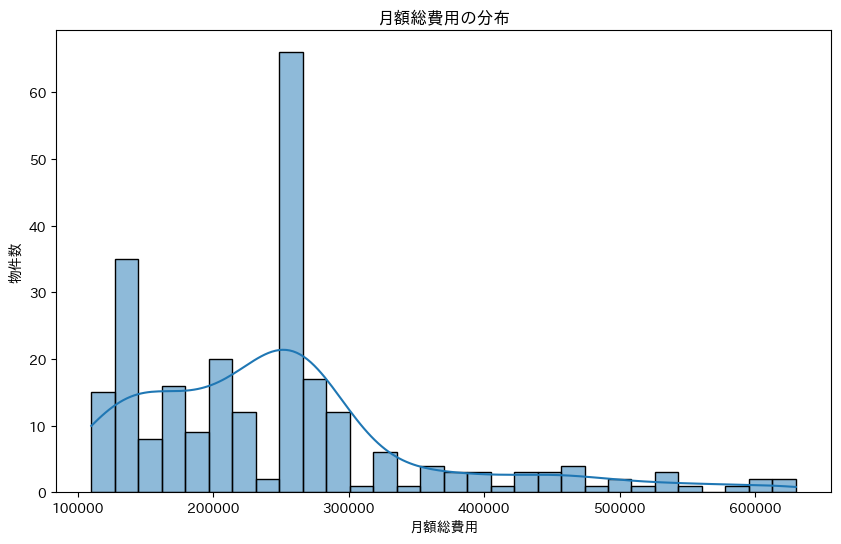

In [81]:
plt.figure(figsize=(10,6))
sns.histplot(df['monthly_total_cost'], kde=True, bins=30)  # kde=Trueで密度推定を追加
plt.title('月額総費用の分布')
plt.xlabel('月額総費用')
plt.ylabel('物件数')
plt.show()

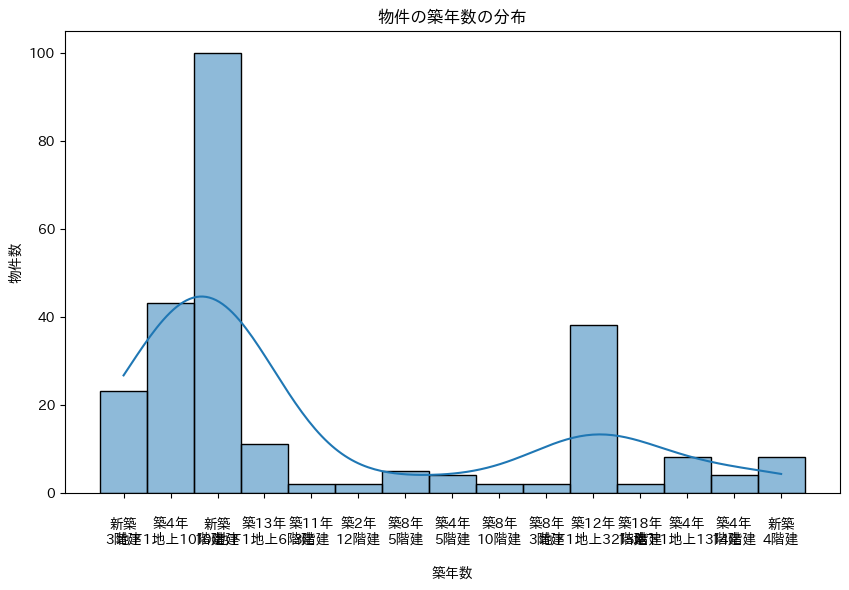

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('物件の築年数の分布')
plt.xlabel('築年数')
plt.ylabel('物件数')
plt.show()

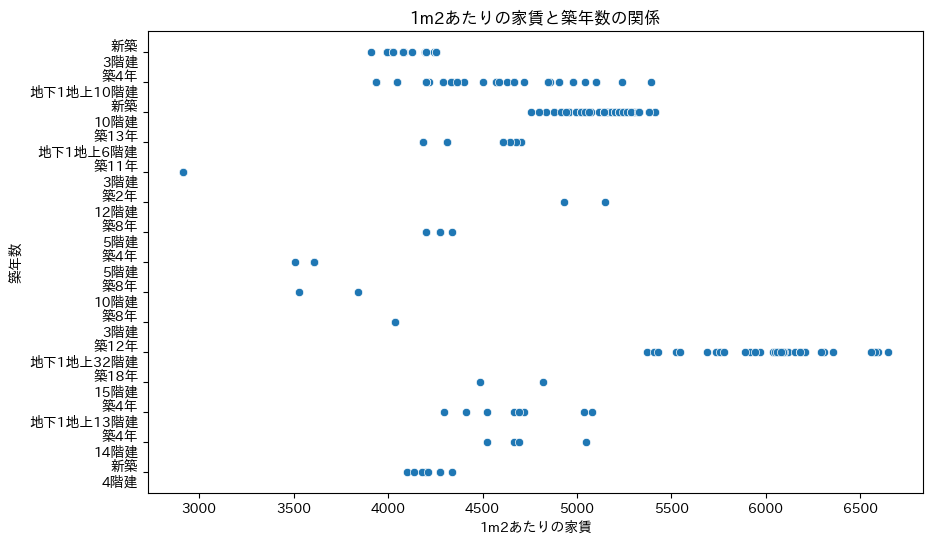

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['rent_per_m2'], y=df['age'])
plt.title('1m2あたりの家賃と築年数の関係')
plt.xlabel('1m2あたりの家賃')
plt.ylabel('築年数')
plt.show()

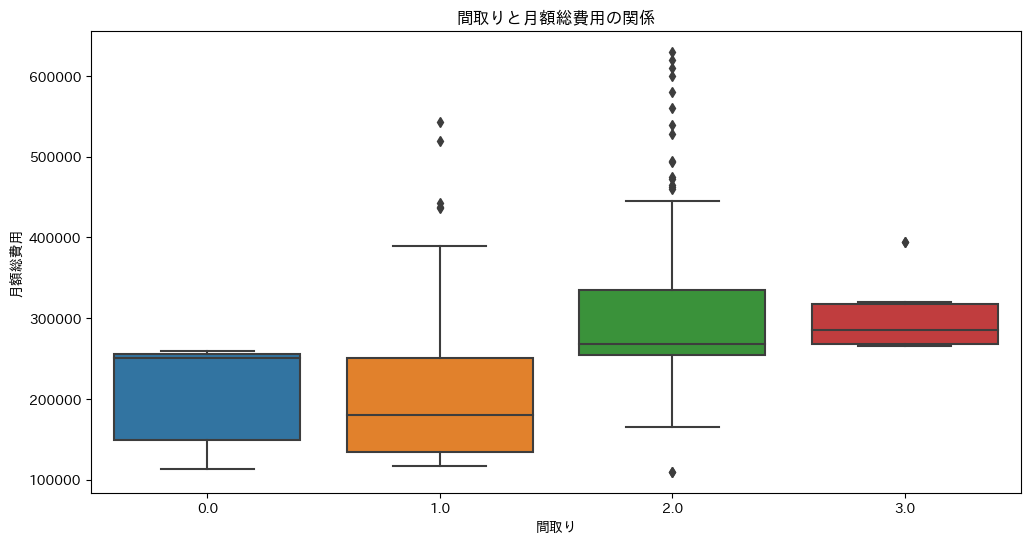

In [84]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['madori'], y=df['monthly_total_cost'])
plt.title('間取りと月額総費用の関係')
plt.xlabel('間取り')
plt.ylabel('月額総費用')
plt.show()